ДЗ 1

### EDA

In [2]:
import pandas as pd

# Загрузка данных
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Первичный анализ структуры данных
print("Train Info:")
print(train.info())
print("\nTrain Head:")
print(train.head())

print("\nTest Info:")
print(test.info())
print("\nTest Head:")
print(test.head())

# Уникальные магазины и товары
print("\nUnique stores in train:", train['store'].nunique())
print("Unique products in train:", train['product'].nunique())

# Проверка диапазона дат
print("\nTrain Date Range:", train['Date'].min(), "to", train['Date'].max())
print("Test Date Range:", test['Date'].min(), "to", test['Date'].max())


Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         230090 non-null  object
 1   store        230090 non-null  int64 
 2   product      230090 non-null  int64 
 3   number_sold  230090 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.0+ MB
None

Train Head:
         Date  store  product  number_sold
0  2010-01-01      0        0          801
1  2010-01-02      0        0          810
2  2010-01-03      0        0          818
3  2010-01-04      0        0          796
4  2010-01-05      0        0          808

Test Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25550 entries, 0 to 25549
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         25550 non-null  object
 1   store        25550 non-null  int64 
 2   product    

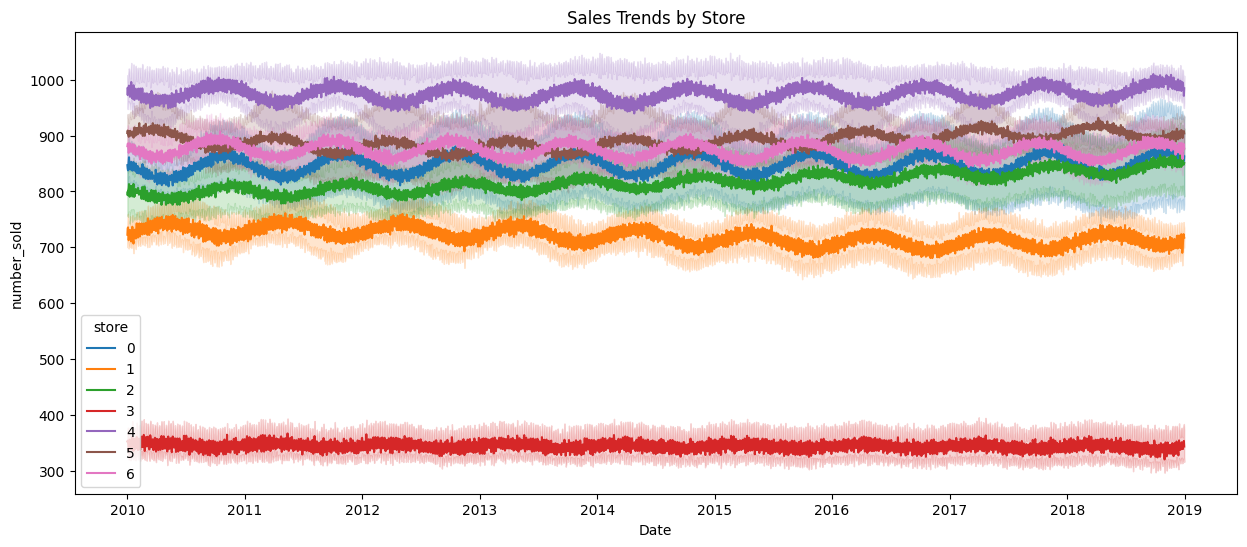

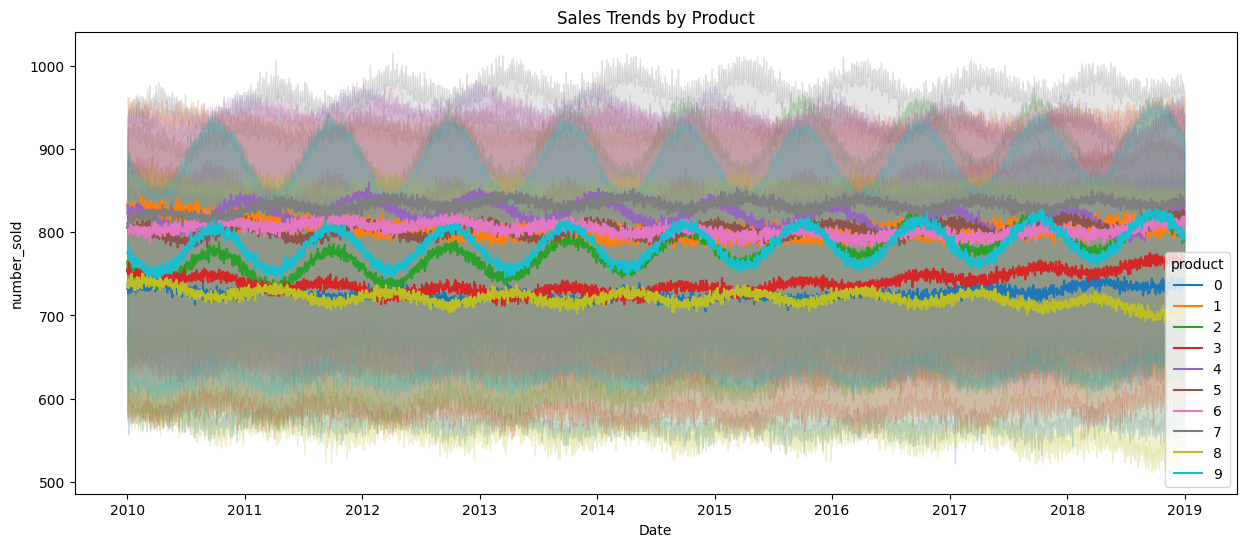

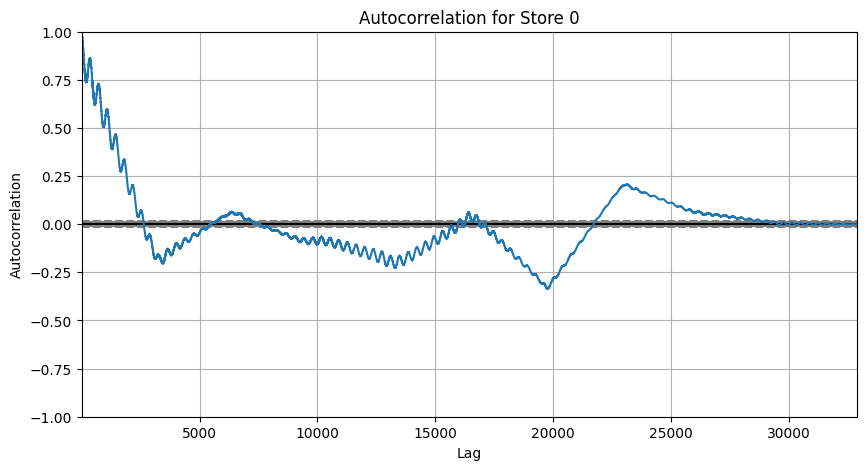

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразуем Date в datetime
train['Date'] = pd.to_datetime(train['Date'])

# График продаж для каждого магазина и товара
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='number_sold', hue='store', data=train, palette='tab10')
plt.title('Sales Trends by Store')
plt.show()

plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='number_sold', hue='product', data=train, palette='tab10')
plt.title('Sales Trends by Product')
plt.show()

# Автокорреляция для общего ряда
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 5))
autocorrelation_plot(train.loc[train['store'] == 0, 'number_sold'])
plt.title('Autocorrelation for Store 0')
plt.show()


In [6]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 1.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 2.0 MB/s eta 0:00:00a 0:00:01


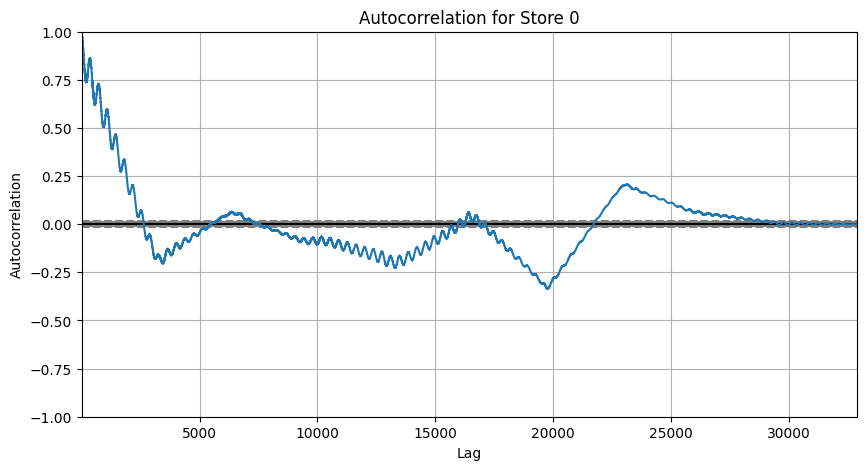

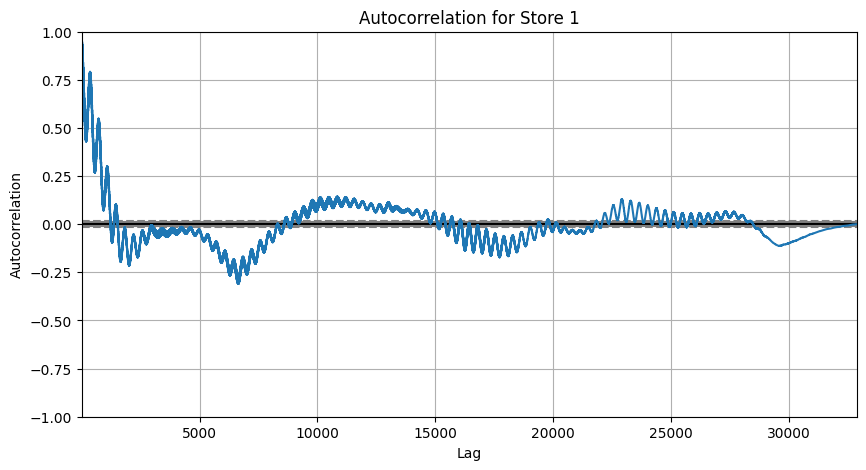

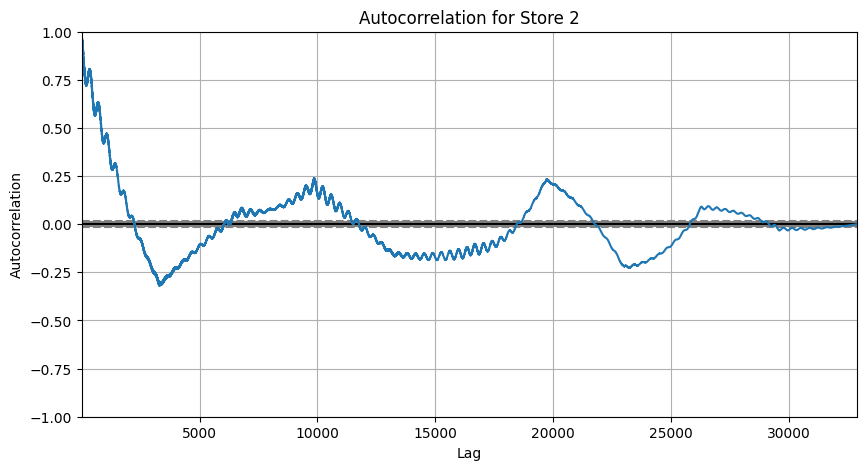

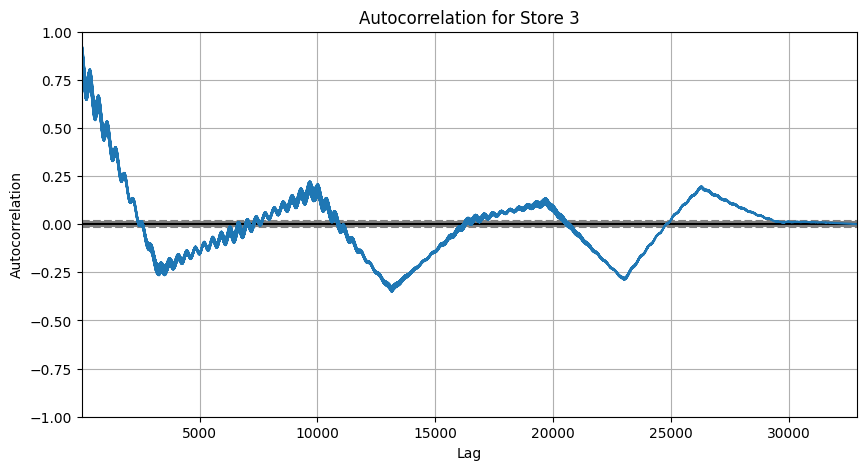

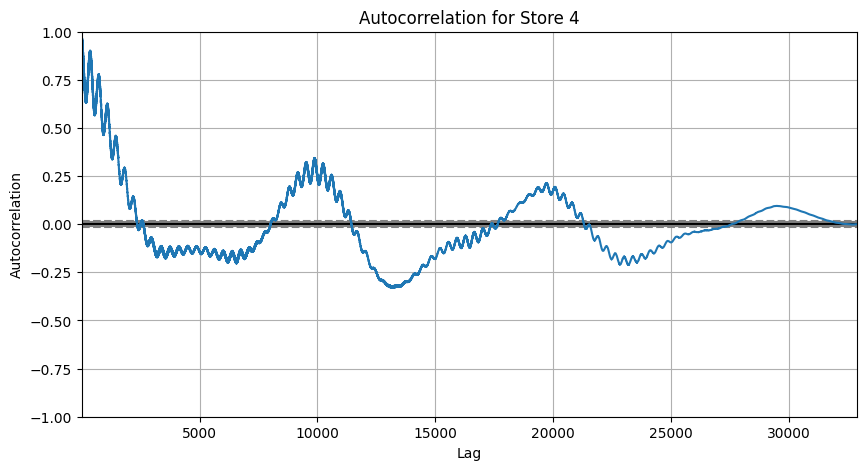

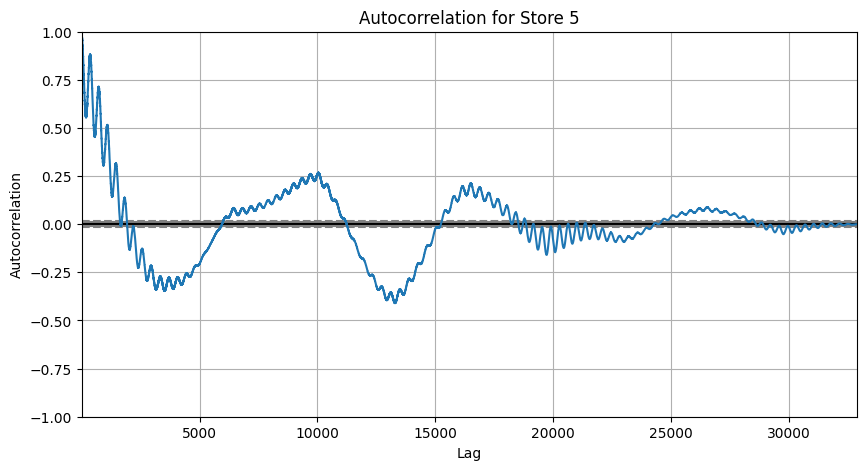

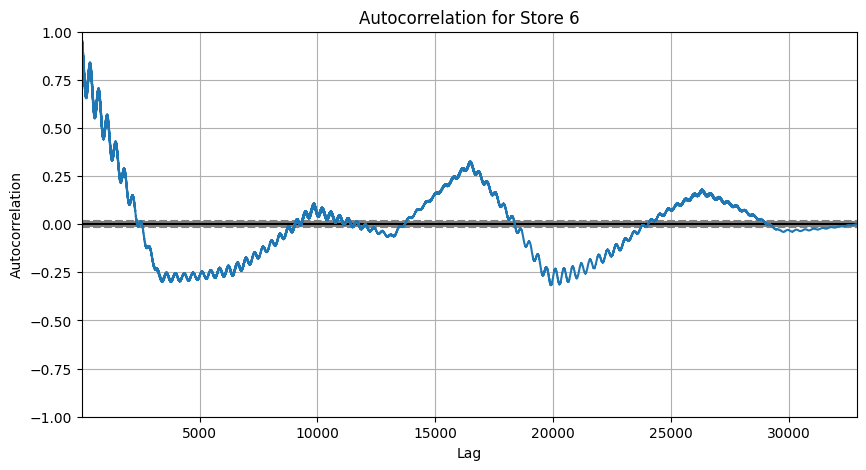

Product 0:
  ADF Statistic: -2.2554484037814797
  p-value: 0.1867393815507235
  Stationary: No
------------------------------
Product 1:
  ADF Statistic: -2.4730215618723506
  p-value: 0.12217720595323972
  Stationary: No
------------------------------
Product 2:
  ADF Statistic: -2.4228096922574913
  p-value: 0.1354017566966525
  Stationary: No
------------------------------
Product 3:
  ADF Statistic: -3.010964237168539
  p-value: 0.03388308777494735
  Stationary: Yes
------------------------------
Product 4:
  ADF Statistic: -2.518817796148677
  p-value: 0.1109626270762274
  Stationary: No
------------------------------
Product 5:
  ADF Statistic: -2.2772847708431962
  p-value: 0.17939876560499785
  Stationary: No
------------------------------
Product 6:
  ADF Statistic: -2.8134569374377314
  p-value: 0.05637710244489101
  Stationary: No
------------------------------
Product 7:
  ADF Statistic: -2.684206849744577
  p-value: 0.07681127192585792
  Stationary: No
--------------------

In [4]:
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

# Автокорреляция для всех магазинов
stores = train['store'].unique()
for store in stores:
    plt.figure(figsize=(10, 5))
    autocorrelation_plot(train[train['store'] == store]['number_sold'])
    plt.title(f'Autocorrelation for Store {store}')
    plt.show()

# Тест стационарности для всех товаров
products = train['product'].unique()
stationarity_results = {}
for product in products:
    filtered_data = train[train['product'] == product]['number_sold']
    result = adfuller(filtered_data)
    stationarity_results[product] = {
        "ADF Statistic": result[0],
        "p-value": result[1],
        "Critical Values": result[4],
        "Stationary": result[1] < 0.05
    }

# Вывод результатов стационарности
for product, stats in stationarity_results.items():
    print(f"Product {product}:")
    print(f"  ADF Statistic: {stats['ADF Statistic']}")
    print(f"  p-value: {stats['p-value']}")
    print(f"  Stationary: {'Yes' if stats['Stationary'] else 'No'}")
    print("-" * 30)

у нас явно есть сезонность -> берем SARIMA

In [ ]:
train_diff = train.copy()
train_diff['number_sold_diff'] = train.groupby(['store', 'product'])['number_sold'].diff()

print("Missing values after differencing:", train_diff['number_sold_diff'].isna().sum())

train_diff = train_diff.dropna()

product_example = 0
result = adfuller(train_diff[train_diff['product'] == product_example]['number_sold_diff'])
print("ADF Statistic after differencing:", result[0])
print("p-value:", result[1])


Missing values after differencing: 70
ADF Statistic after differencing: -13.10248116683495
p-value: 1.6986744716729638e-24


In [10]:
!pip install pmdarima


  Using cached Cython-3.0.11-py2.py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.4/630.4 kB 926.7 kB/s eta 0:00:00 0:00:01m
Using cached Cython-3.0.11-py2.py3-none-any.whl (1.2 MB)


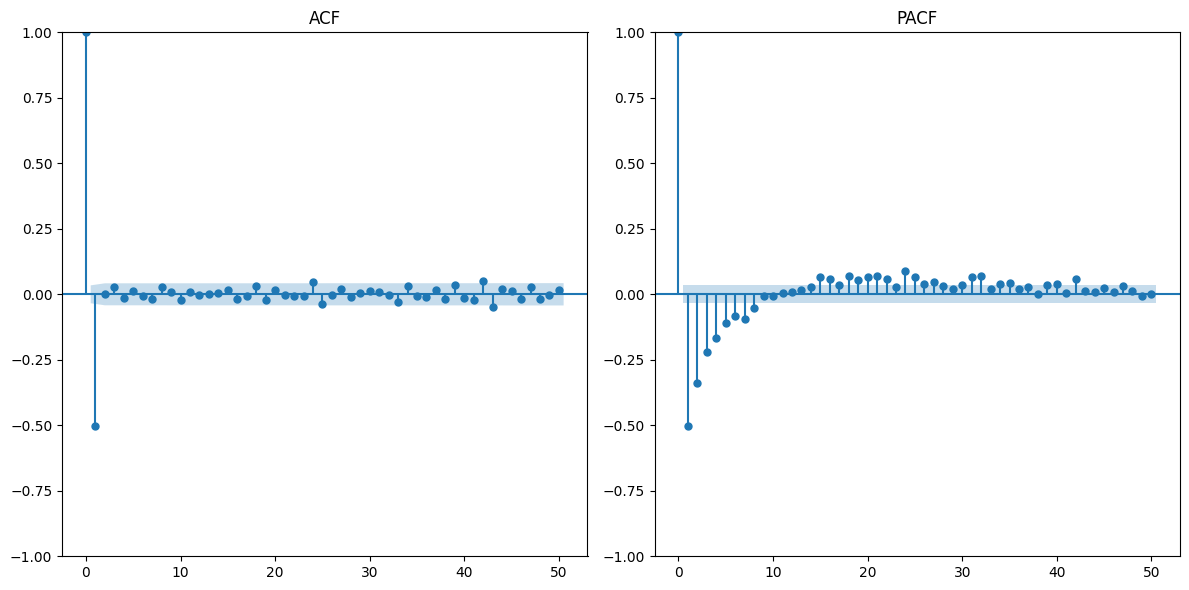

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Берём примерный ряд (store=0, product=0)
store_example = 0
product_example = 0
train_series = train_diff[(train_diff['store'] == store_example) & (train_diff['product'] == product_example)]['number_sold_diff']

# Построение ACF и PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(train_series, ax=plt.gca(), lags=50)
plt.title("ACF")
plt.subplot(122)
plot_pacf(train_series, ax=plt.gca(), lags=50)
plt.title("PACF")
plt.tight_layout()

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

store_id = 0
product_id = 0

train_sample = train[
    (train['store'] == store_id) & 
    (train['product'] == product_id)
].copy()

train_sample['Date'] = pd.to_datetime(train_sample['Date'])

train_weekly = train_sample.set_index('Date')
train_weekly = train_weekly['number_sold'].resample('W').mean()

model = SARIMAX(
    train_weekly,
    order=(1, 1, 1),  
    seasonal_order=(1, 1, 1, 52), 
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()

test_sample = test[
    (test['store'] == store_id) & 
    (test['product'] == product_id)
].copy()

test_sample['Date'] = pd.to_datetime(test_sample['Date'])
test_weekly = test_sample.set_index('Date')
test_weekly = test_weekly['number_sold'].resample('W').mean()

predictions = results.get_forecast(steps=len(test_weekly))
predicted_mean = predictions.predicted_mean

mape = mean_absolute_percentage_error(test_weekly, predicted_mean)
rmse = np.sqrt(mean_squared_error(test_weekly, predicted_mean))
r2 = r2_score(test_weekly, predicted_mean)

print(f"MAPE: {mape:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37307D+00    |proj g|=  1.15406D-01

At iterate    5    f=  2.31571D+00    |proj g|=  5.96645D-02

At iterate   10    f=  2.30072D+00    |proj g|=  1.09477D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     15      1     0     0   3.155D-06   2.301D+00
  F =   2.3007155705823874     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
MAPE: 0.0140
RMSE: 13.5964
R2: 0.8415


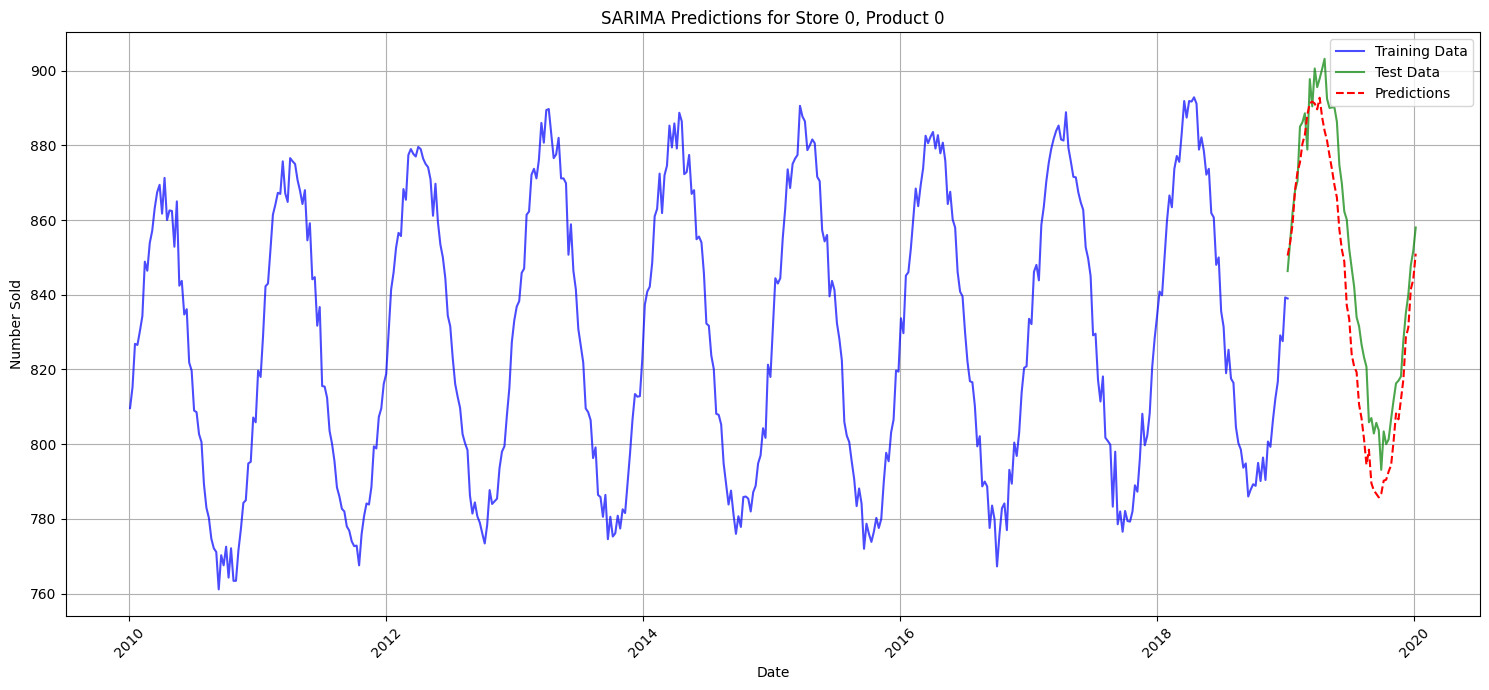

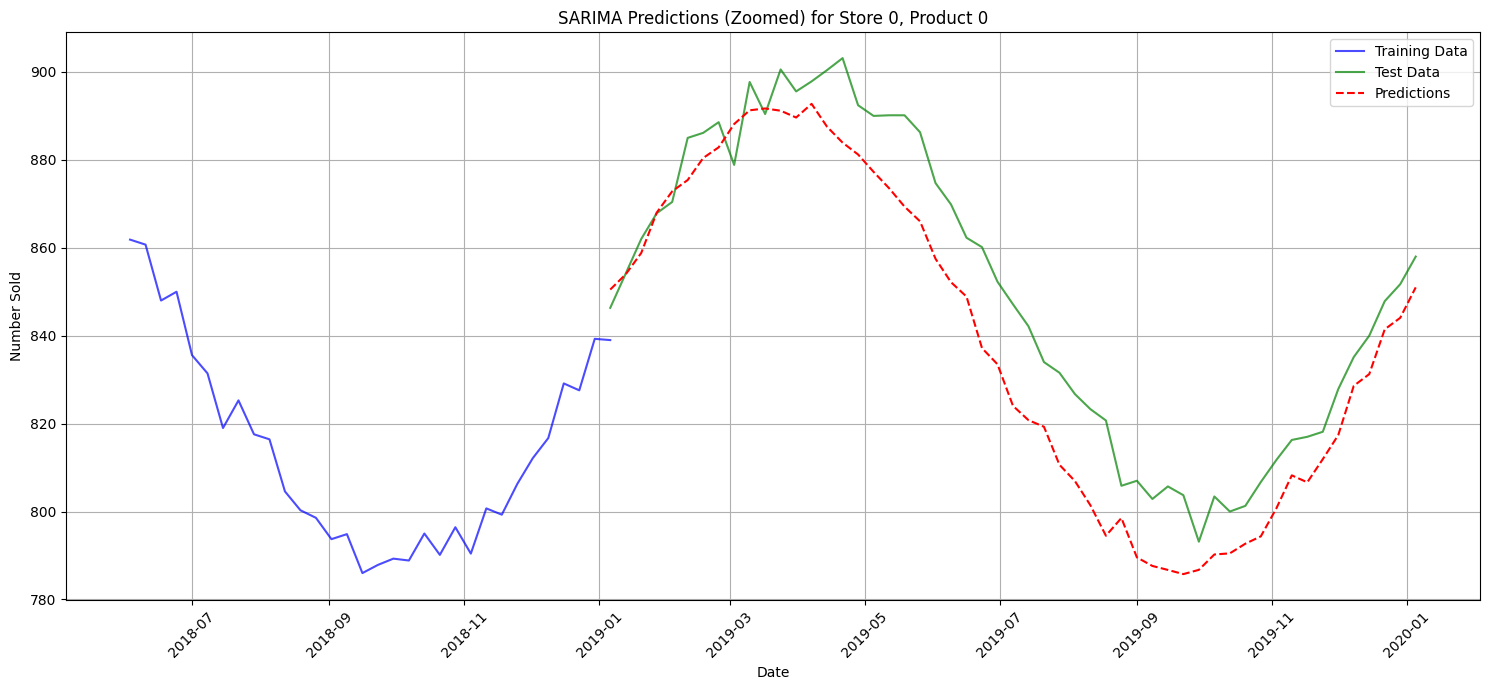


Confidence Intervals for predictions:
            lower number_sold  upper number_sold
2019-01-13         841.440448         859.550858
2019-01-20         844.872311         863.073482
2019-01-27         849.548228         868.081262
2019-02-03         858.590330         877.418241
2019-02-10         863.285165         882.406490


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

plt.plot(train_weekly.index, train_weekly.values, label='Training Data', color='blue', alpha=0.7)

plt.plot(test_weekly.index, test_weekly.values, label='Test Data', color='green', alpha=0.7)

plt.plot(test_weekly.index, predicted_mean, label='Predictions', color='red', linestyle='--')

plt.title(f'SARIMA Predictions for Store {store_id}, Product {product_id}')
plt.xlabel('Date')
plt.ylabel('Number Sold')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

zoom_start = '2018-06-01' 
plt.figure(figsize=(15, 7))

mask_train = train_weekly.index >= zoom_start
plt.plot(train_weekly[mask_train].index, train_weekly[mask_train].values, 
         label='Training Data', color='blue', alpha=0.7)

plt.plot(test_weekly.index, test_weekly.values, label='Test Data', color='green', alpha=0.7)

plt.plot(test_weekly.index, predicted_mean, label='Predictions', color='red', linestyle='--')

plt.title(f'SARIMA Predictions (Zoomed) for Store {store_id}, Product {product_id}')
plt.xlabel('Date')
plt.ylabel('Number Sold')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

confidence_intervals = predictions.conf_int()
print("\nConfidence Intervals for predictions:")
print(confidence_intervals.head())

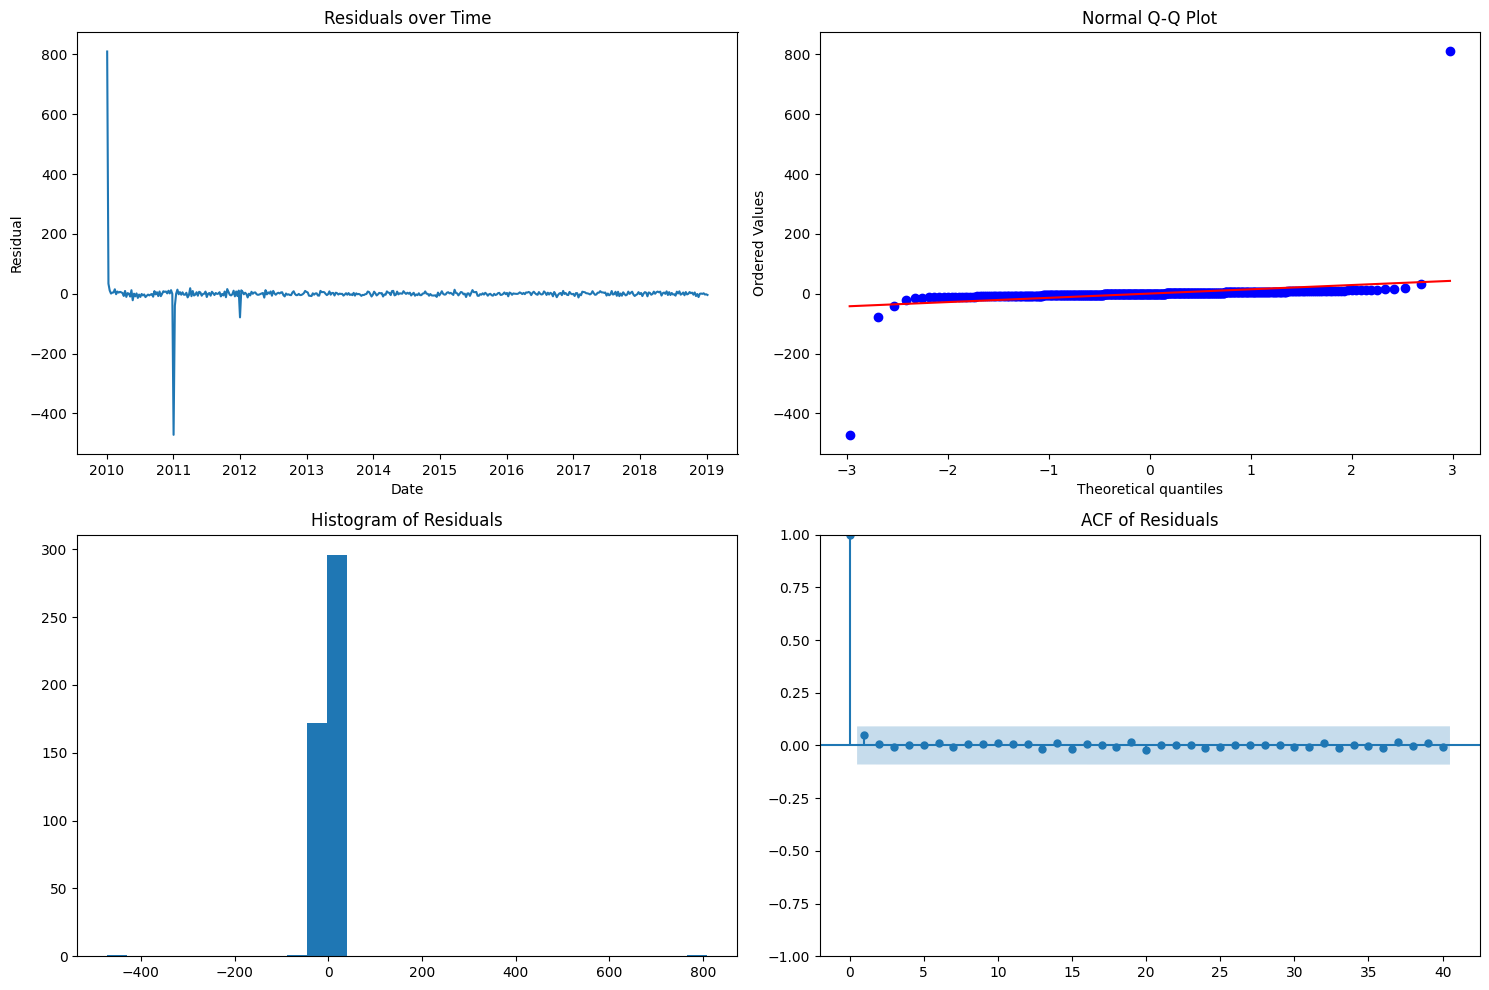


Diagnostic Tests:
Durbin-Watson statistic: 1.1760
Shapiro-Wilk p-value: 0.0000

Ljung-Box test p-values:
1     0.291093
2     0.568497
3     0.762846
4     0.884757
5     0.948670
6     0.974930
7     0.989603
8     0.995911
9     0.998469
10    0.999387
Name: lb_pvalue, dtype: float64


In [ ]:
# Получаем остатки модели
residuals = results.resid

# 1. Визуальный анализ распределения остатков
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0,0].plot(residuals)
axes[0,0].set_title('Residuals over Time')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Residual')

import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=axes[0,1])
axes[0,1].set_title('Normal Q-Q Plot')

axes[1,0].hist(residuals, bins=30)
axes[1,0].set_title('Histogram of Residuals')

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=40, ax=axes[1,1])
axes[1,1].set_title('ACF of Residuals')

plt.tight_layout()
plt.show()

from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)

from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(residuals, lags=10)

_, shapiro_p = stats.shapiro(residuals)

print("\nDiagnostic Tests:")
print(f"Durbin-Watson statistic: {dw_stat:.4f}")
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")
print("\nLjung-Box test p-values:")
print(lb_test['lb_pvalue'])

Testing 144 different combinations...
SARIMA(0, 0, 0)x(0, 0, 0, 52) - AIC:7653.434
SARIMA(0, 0, 0)x(0, 0, 1, 52) - AIC:6817.919
SARIMA(0, 0, 0)x(0, 1, 0, 52) - AIC:2819.663
SARIMA(0, 0, 0)x(0, 1, 1, 52) - AIC:2397.511
SARIMA(0, 0, 0)x(1, 0, 0, 52) - AIC:2750.096
SARIMA(0, 0, 0)x(1, 0, 1, 52) - AIC:2723.637
SARIMA(0, 0, 0)x(1, 1, 0, 52) - AIC:2402.755
SARIMA(0, 0, 0)x(1, 1, 1, 52) - AIC:2343.186
SARIMA(0, 0, 1)x(0, 0, 0, 52) - AIC:7004.435
SARIMA(0, 0, 1)x(0, 0, 1, 52) - AIC:5791.326
SARIMA(0, 0, 1)x(0, 1, 0, 52) - AIC:2775.727
SARIMA(0, 0, 1)x(0, 1, 1, 52) - AIC:2365.079
SARIMA(0, 0, 1)x(1, 0, 0, 52) - AIC:2733.998
SARIMA(0, 0, 1)x(1, 0, 1, 52) - AIC:2798.573
SARIMA(0, 0, 1)x(1, 1, 0, 52) - AIC:2379.446
SARIMA(0, 0, 1)x(1, 1, 1, 52) - AIC:2316.189
SARIMA(0, 0, 2)x(0, 0, 0, 52) - AIC:6392.854
SARIMA(0, 0, 2)x(0, 0, 1, 52) - AIC:5308.439
SARIMA(0, 0, 2)x(0, 1, 0, 52) - AIC:2741.548
SARIMA(0, 0, 2)x(0, 1, 1, 52) - AIC:2327.902
SARIMA(0, 0, 2)x(1, 0, 0, 52) - AIC:2717.210
SARIMA(0, 0, 2)x(

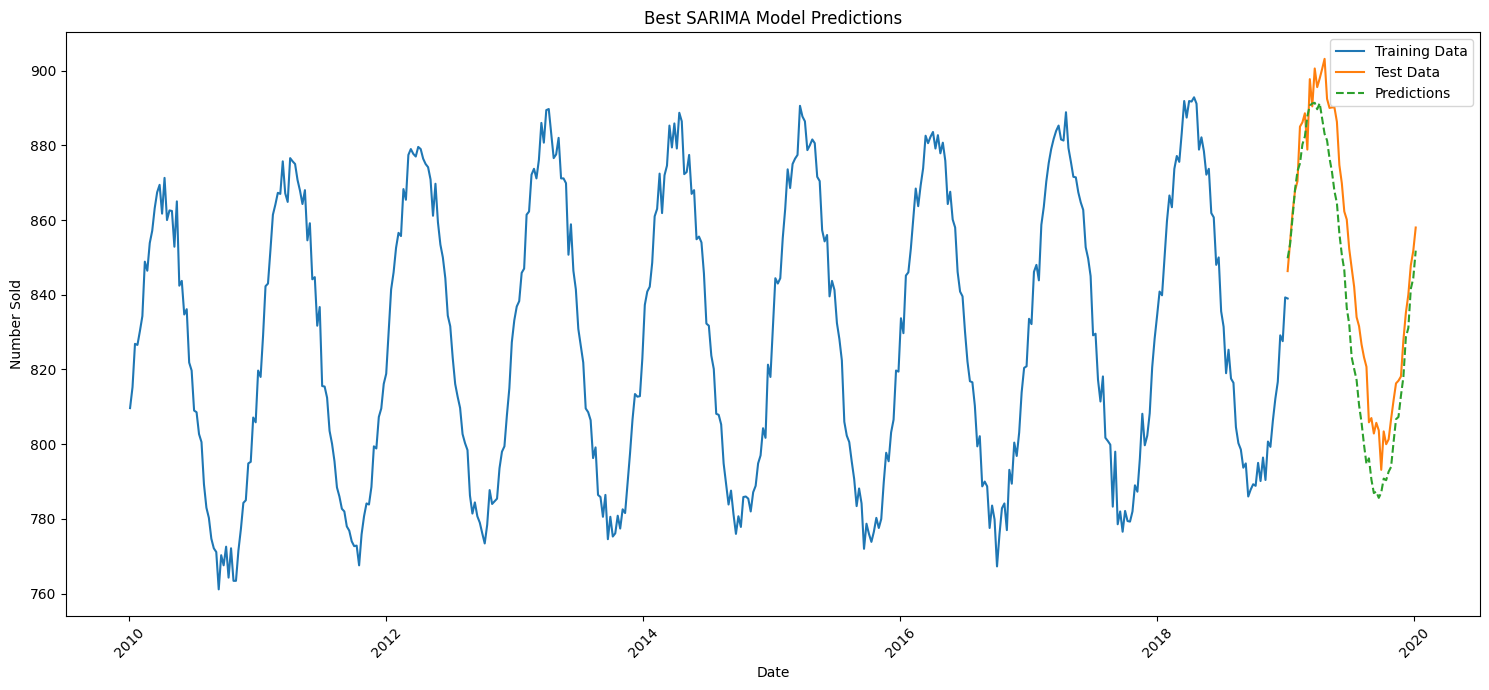

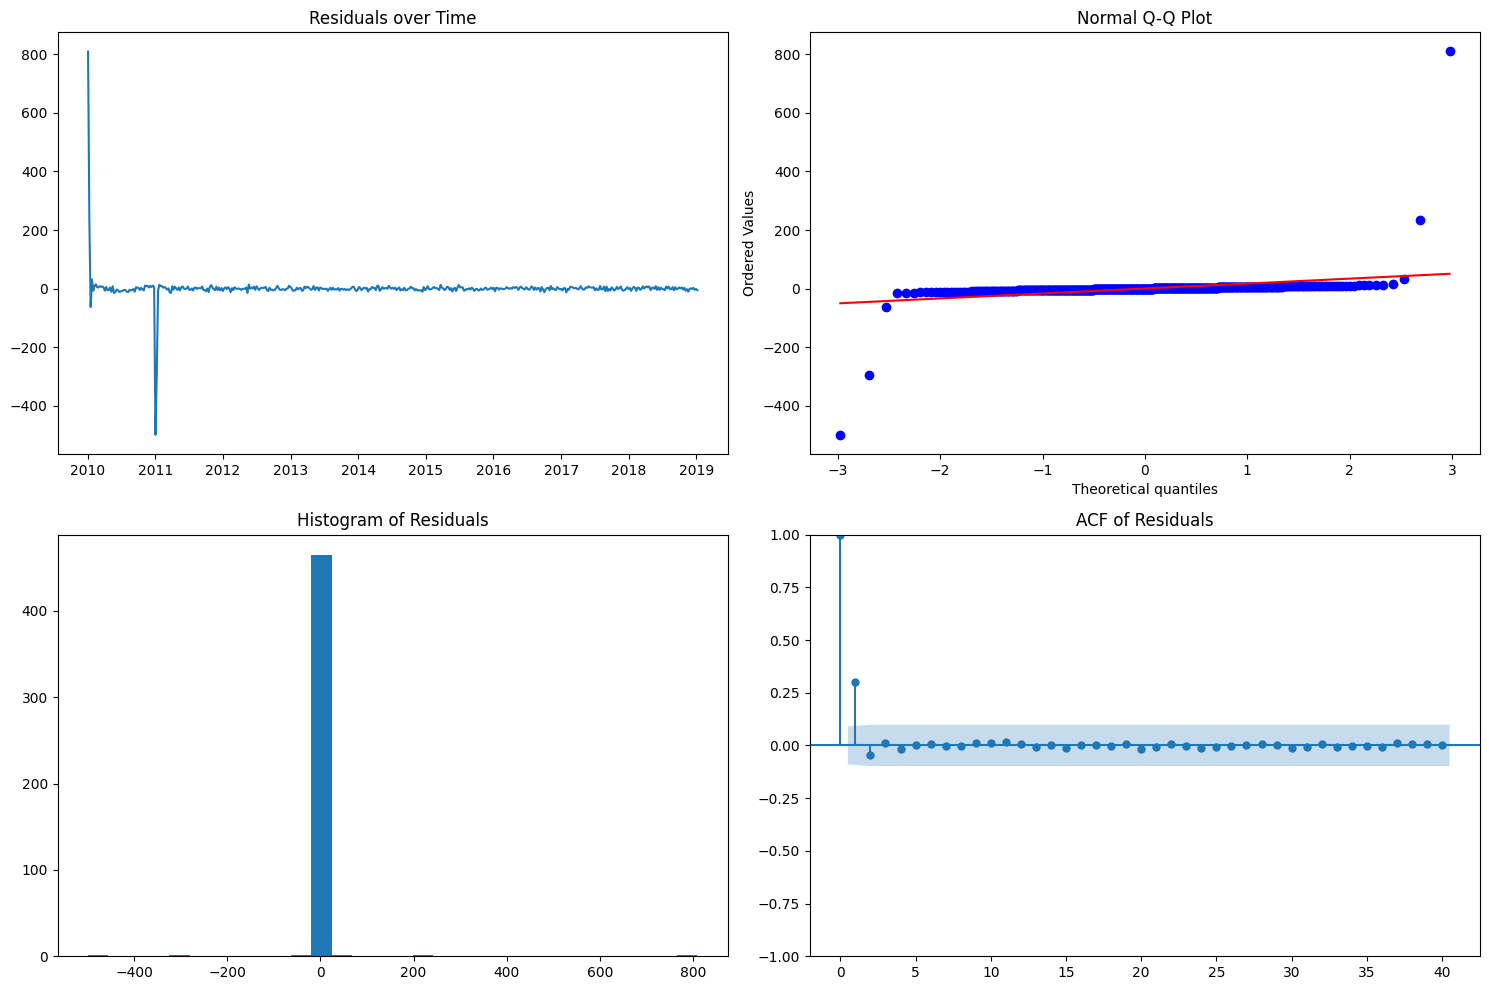

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
import warnings
warnings.filterwarnings('ignore')

def evaluate_sarima_parameters(data, p_range, d_range, q_range, P_range, D_range, Q_range, s=52):
    best_score = float('inf')
    best_params = None
    best_model = None
    
    pdq = list(product(p_range, d_range, q_range))
    seasonal_pdq = list(product(P_range, D_range, Q_range, [s]))
    
    total_combinations = len(pdq) * len(seasonal_pdq)
    print(f"Testing {total_combinations} different combinations...")
    
    results = []
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(data,
                              order=param,
                              seasonal_order=param_seasonal,
                              enforce_stationarity=False,
                              enforce_invertibility=False)
                
                model_fit = model.fit(disp=False)
                aic = model_fit.aic
                
                results.append({
                    'param': param,
                    'param_seasonal': param_seasonal,
                    'aic': aic
                })
                
                if aic < best_score:
                    best_score = aic
                    best_params = (param, param_seasonal)
                    best_model = model_fit
                
                print(f'SARIMA{param}x{param_seasonal} - AIC:{aic:.3f}')
                
            except:
                continue
    
    return best_params, best_model, pd.DataFrame(results)

p_range = range(0, 3)
d_range = range(0, 2)
q_range = range(0, 3)
P_range = range(0, 2)
D_range = range(0, 2)
Q_range = range(0, 2)

best_params, best_model, results_df = evaluate_sarima_parameters(
    train_weekly,
    p_range, d_range, q_range,
    P_range, D_range, Q_range
)

print("\nBest Parameters:")
print(f"SARIMA{best_params[0]}x{best_params[1]}")

print("\nTop 5 Models:")
results_df_sorted = results_df.sort_values('aic')
print(results_df_sorted.head())

predictions = best_model.get_forecast(steps=len(test_weekly))
predicted_mean = predictions.predicted_mean

mape = mean_absolute_percentage_error(test_weekly, predicted_mean)
rmse = np.sqrt(mean_squared_error(test_weekly, predicted_mean))
r2 = r2_score(test_weekly, predicted_mean)

print("\nBest Model Metrics:")
print(f"MAPE: {mape:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")

plt.figure(figsize=(15, 7))
plt.plot(train_weekly.index, train_weekly.values, label='Training Data')
plt.plot(test_weekly.index, test_weekly.values, label='Test Data')
plt.plot(test_weekly.index, predicted_mean, label='Predictions', linestyle='--')
plt.title('Best SARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Number Sold')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

residuals = best_model.resid
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0,0].plot(residuals)
axes[0,0].set_title('Residuals over Time')

import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=axes[0,1])
axes[0,1].set_title('Normal Q-Q Plot')

axes[1,0].hist(residuals, bins=30)
axes[1,0].set_title('Histogram of Residuals')

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=40, ax=axes[1,1])
axes[1,1].set_title('ACF of Residuals')

plt.tight_layout()
plt.show()